<a href="https://colab.research.google.com/github/odouglasaraujo/Projeto_Aplicado_III_2024/blob/main/Spotlist_Projeto_III_Etapa_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

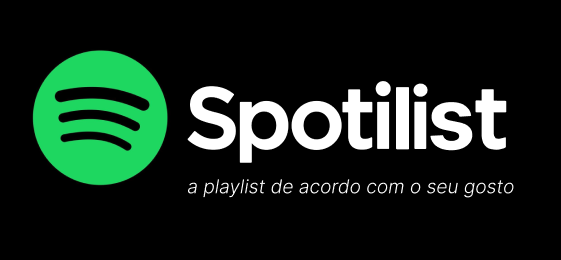

In [2]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Douglas Pereira de Araújo, RA 10370116' #@param {type:"string"}
Aluno2 = 'Samuel Regis Nascimento Barbosa, RA 10369514' #@param {type:"string"}

Link_Video_do_Youtube = 'https://www.youtube.com/watch?v=dqquGo0bD7g' #@param {type:"string"}



##**Diagrama de Solução**


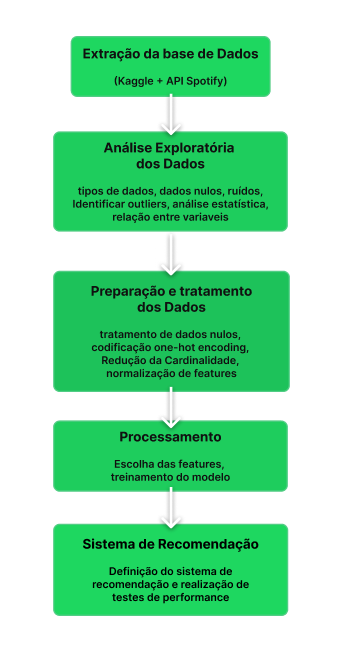

## **Importação das Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


## **Carregamento dos Dados**


In [ ]:
# Carregar os dados

# ID do arquivo
file_id = '1oCH1L_DszOsEhOsYyVcQxgfCZlWG8dWQ'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Carregar os dados
df_spotify = pd.read_csv(url)

# Verifique se os dados foram carregados corretamente
df_spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## **Exploração Inicial dos dados**

In [ ]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
df_spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
df_spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
df_spotify.isnull().sum()
from tabulate import tabulate

# Visualizar as primeiras linhas do DataFrame com valores ausentes
print(tabulate(df_spotify[df_spotify.isnull().any(axis=1)].head(), headers='keys', tablefmt='grid'))

+-------+------------------------+--------------+----------------+--------------------+------------------------+--------------------+----------------------------+---------------------+------------------------+------------------+---------------------+----------------+----------+-------+------------+--------+---------------+----------------+--------------------+------------+-----------+---------+---------------+
|       | track_id               |   track_name |   track_artist |   track_popularity | track_album_id         |   track_album_name | track_album_release_date   | playlist_name       | playlist_id            | playlist_genre   | playlist_subgenre   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |   tempo |   duration_ms |
+=======+========================+==============+================+====================+========================+====================+============================+==========

##**Analise Exploratoria de Dados - EDA**

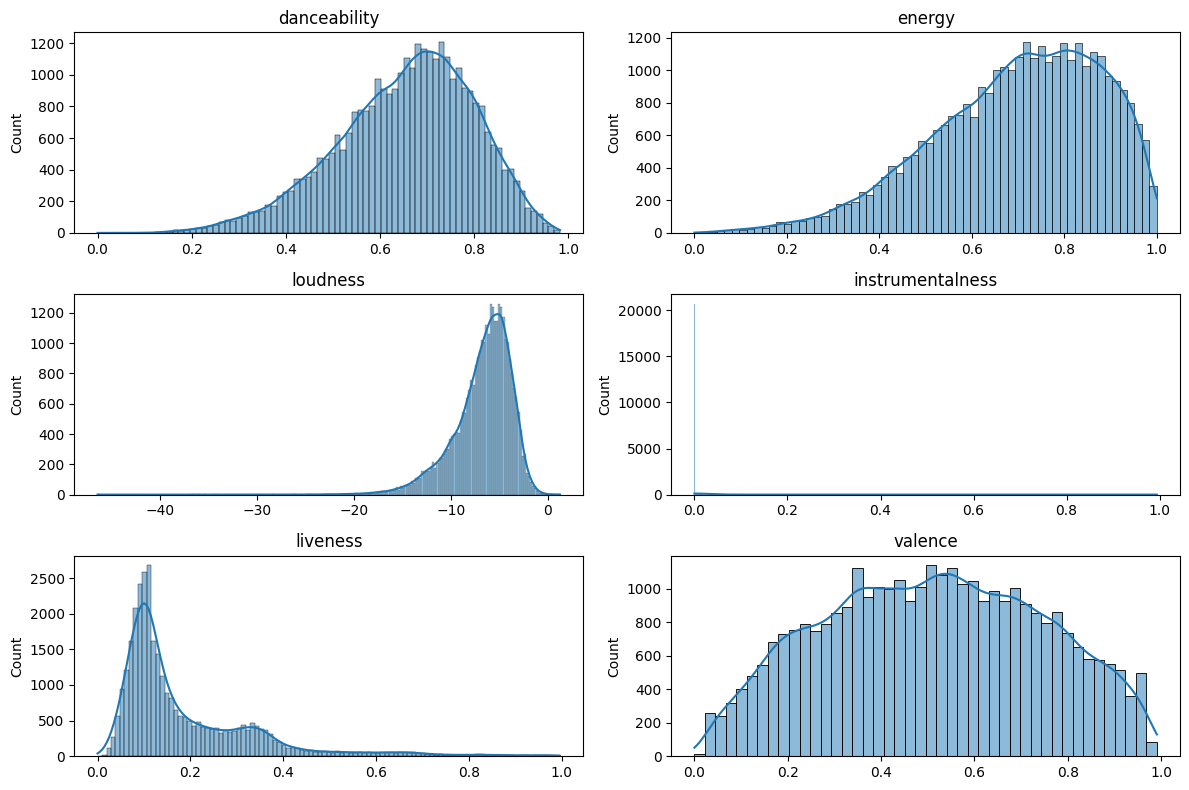

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas as colunas numéricas
numeric_cols = ['danceability', 'energy', 'loudness', 'instrumentalness', 'liveness', 'valence']

# Plotar histogramas para as variáveis numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_spotify[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

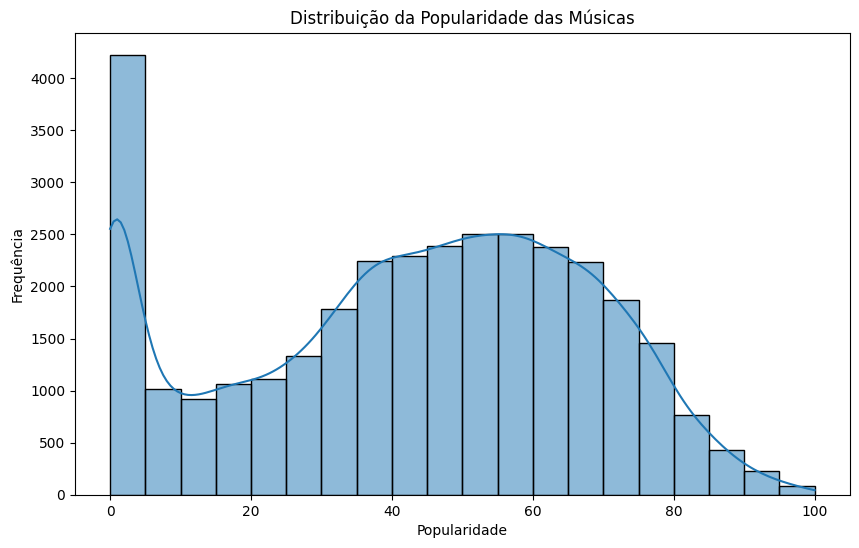

In [ ]:
# Visualizar a distribuição da popularidade das músicas
plt.figure(figsize=(10, 6))
sns.histplot(df_spotify['track_popularity'], bins=20, kde=True)
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

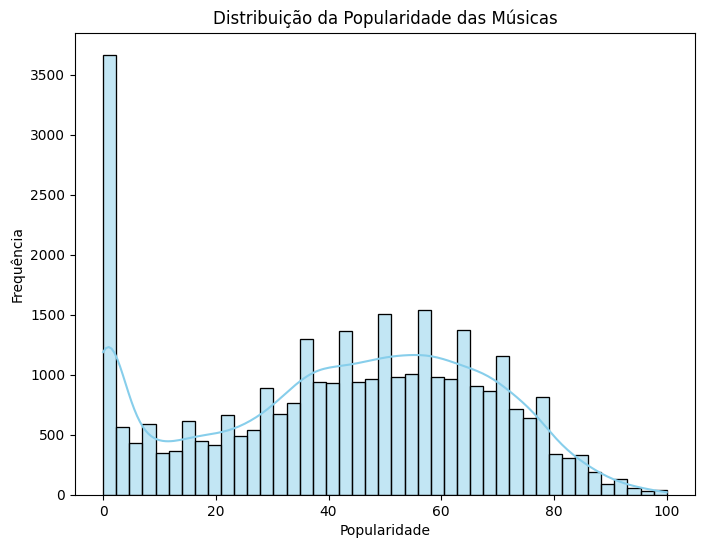

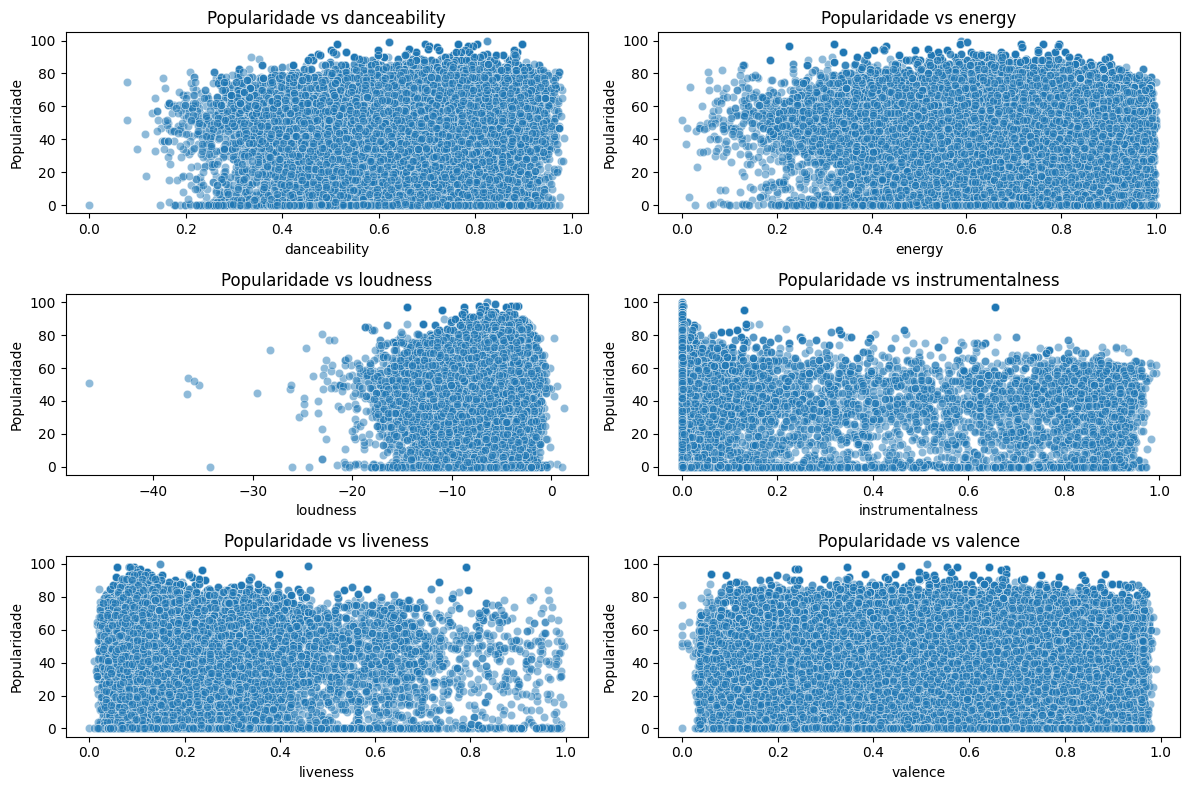

In [ ]:
# Plotar a distribuição da popularidade das músicas
plt.figure(figsize=(8, 6))
sns.histplot(df_spotify['track_popularity'], kde=True, color='skyblue')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

# Plotar relação entre a popularidade e outras variáveis
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=col, y='track_popularity', data=df_spotify, alpha=0.5)
    plt.title(f'Popularidade vs {col}')
    plt.xlabel(col)
    plt.ylabel('Popularidade')
plt.tight_layout()
plt.show()

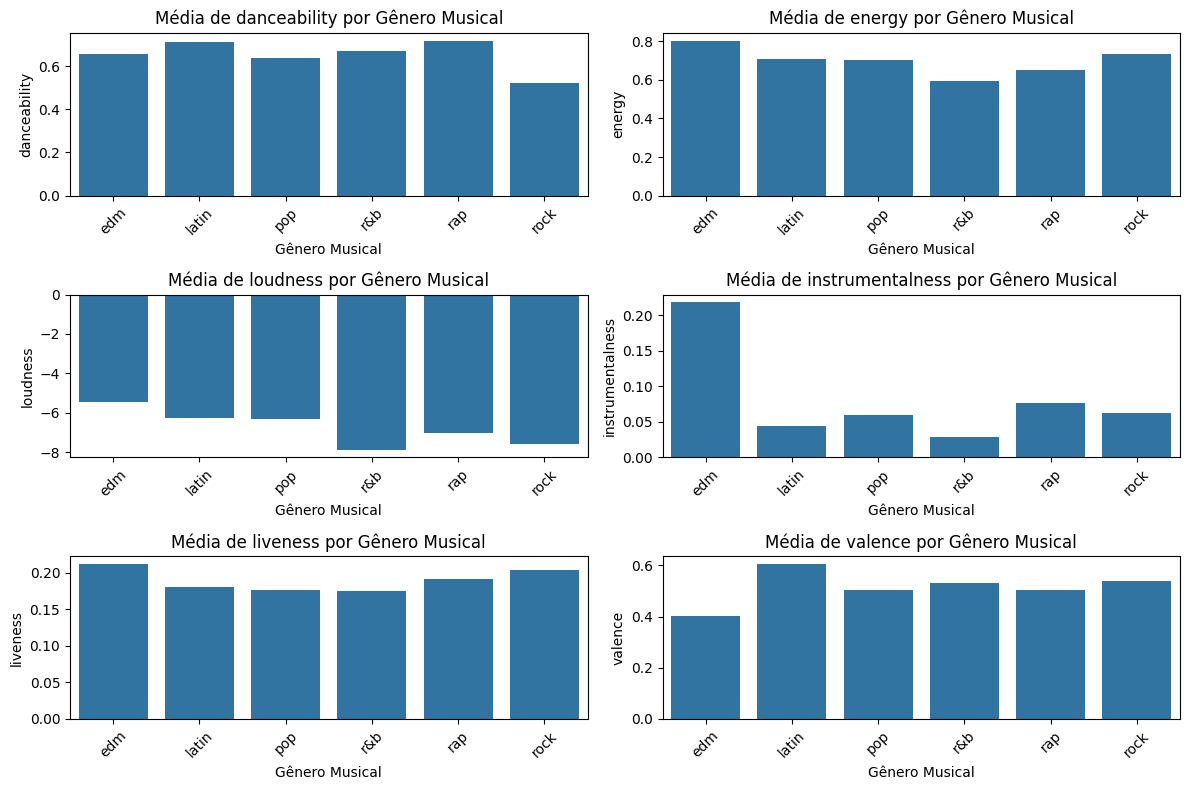

Estatísticas Resumidas das Variáveis Numéricas:
  playlist_genre  danceability    energy  loudness  instrumentalness  \
0            edm      0.655041  0.802476 -5.427445          0.218578   
1          latin      0.713287  0.708312 -6.264455          0.044447   
2            pop      0.639302  0.701028 -6.315328          0.059876   
3            r&b      0.670179  0.590934 -7.864848          0.028920   
4            rap      0.718353  0.650708 -7.042269          0.075997   
5           rock      0.520548  0.732813 -7.588895          0.062417   

   liveness   valence  
0  0.211859  0.400656  
1  0.180626  0.605510  
2  0.176833  0.503521  
3  0.175268  0.531231  
4  0.191654  0.505090  
5  0.203135  0.537352  


In [ ]:
# Calcular estatísticas resumidas para cada gênero musical
genre_stats = df_spotify.groupby('playlist_genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean'
}).reset_index()

# Plotar gráficos de barras para comparar as características por gênero musical
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='playlist_genre', y=col, data=genre_stats)
    plt.title(f'Média de {col} por Gênero Musical')
    plt.xlabel('Gênero Musical')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibir as estatísticas resumidas
print("Estatísticas Resumidas das Variáveis Numéricas:")
print(genre_stats)


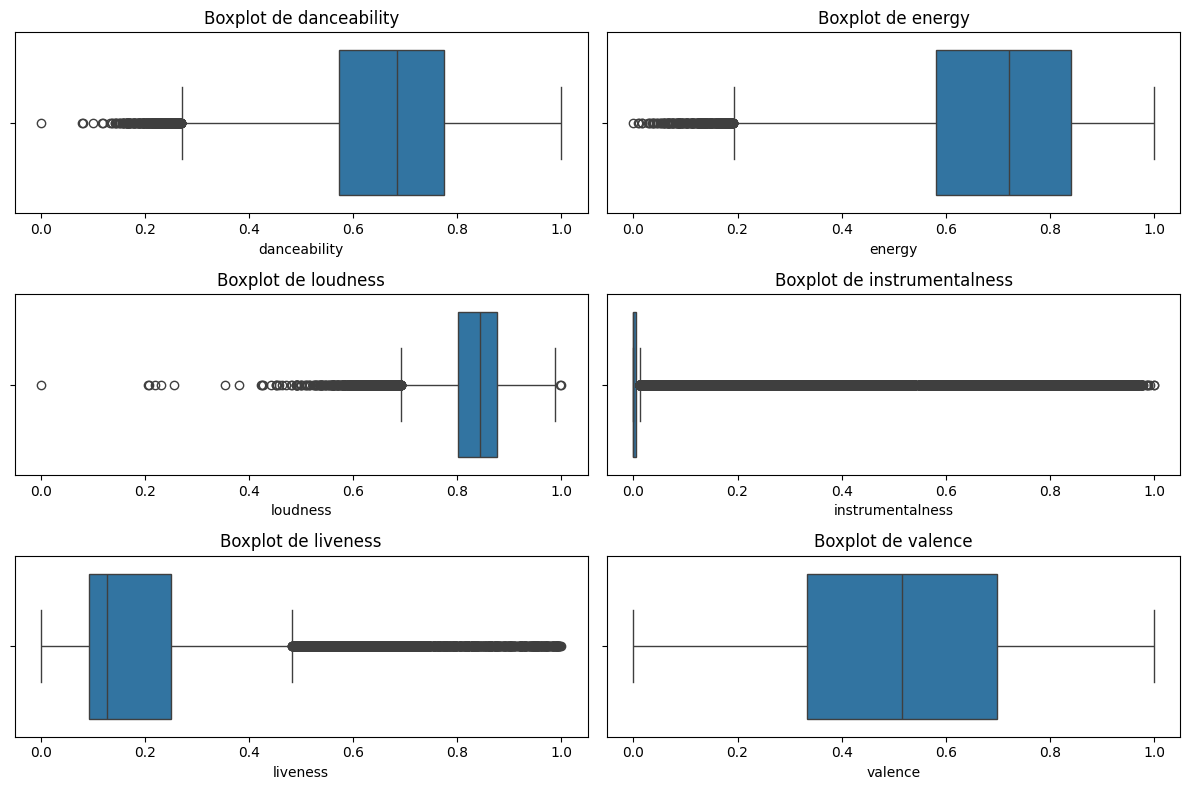

Estatísticas Resumidas das Variáveis Numéricas:
       danceability        energy      loudness  instrumentalness  \
count  32828.000000  32828.000000  32828.000000      32828.000000   
mean       0.666175      0.698550      0.832481          0.085271   
std        0.147601      0.180947      0.062625          0.225598   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.572737      0.580927      0.802061          0.000000   
50%        0.683622      0.720951      0.844079          0.000016   
75%        0.774161      0.839972      0.875951          0.004859   
max        1.000000      1.000000      1.000000          1.000000   

           liveness       valence  
count  32828.000000  32828.000000  
mean       0.190939      0.515193  
std        0.154933      0.235269  
min        0.000000      0.000000  
25%        0.093072      0.334006  
50%        0.127510      0.516650  
75%        0.248996      0.699294  
max        1.000000      1.000000  

Valor

In [ ]:
# Identificar outliers nas variáveis numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_spotify[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Calcular estatísticas resumidas para as variáveis numéricas
numeric_summary = df_spotify[numeric_cols].describe()

# Exibir as estatísticas resumidas
print("Estatísticas Resumidas das Variáveis Numéricas:")
print(numeric_summary)

# Verificar valores ausentes
missing_values = df_spotify[numeric_cols].isnull().sum()
print("Valores Ausentes nas Variáveis Numéricas:")
print(missing_values)

- Contagem (count): Indica o número de observações para cada variável.
- Média (mean): Representa o valor médio dos dados.
- Desvio padrão (std): Indica a dispersão dos dados em torno da média.
- Mínimo (min) e Máximo (max): Representam os valores mínimo e máximo observados.
- Quartis (25%, 50%, 75%): São os valores que dividem os dados em quartis, onde 25% dos dados estão abaixo do primeiro quartil (Q1), 50% dos dados estão abaixo do segundo quartil (mediana) e 75% dos dados estão abaixo do terceiro quartil (Q3).

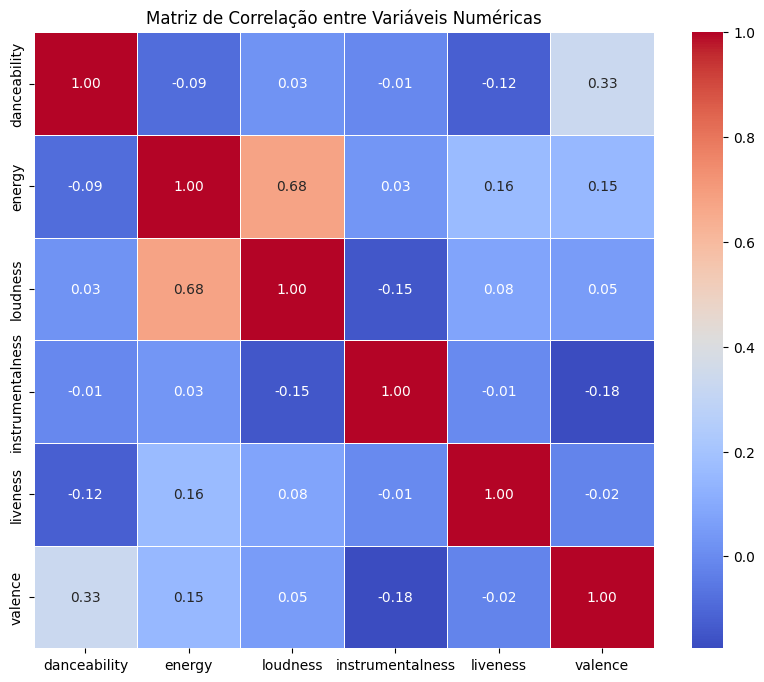

Matriz de Correlação entre Variáveis Numéricas
                  danceability    energy  loudness  instrumentalness  \
danceability          1.000000 -0.086073  0.025335         -0.008655   
energy               -0.086073  1.000000  0.676625          0.033247   
loudness              0.025335  0.676625  1.000000         -0.147824   
instrumentalness     -0.008655  0.033247 -0.147824          1.000000   
liveness             -0.123859  0.161223  0.077613         -0.005507   
valence               0.330523  0.151103  0.053384         -0.175402   

                  liveness   valence  
danceability     -0.123859  0.330523  
energy            0.161223  0.151103  
loudness          0.077613  0.053384  
instrumentalness -0.005507 -0.175402  
liveness          1.000000 -0.020560  
valence          -0.020560  1.000000  


In [ ]:
# Calcular a matriz de correlação
corr_matrix = df_spotify[numeric_cols].corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

print('Matriz de Correlação entre Variáveis Numéricas')
print(corr_matrix)

##**Tratamento dos Dados**

In [ ]:
# Remover linhas com valores ausentes nas colunas track_name, track_artist e track_album_name
df_spotify_cleaned = df_spotify.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verificando se os valores ausentes foram removidos
df_spotify_cleaned[['track_name', 'track_artist', 'track_album_name']].isnull().sum()

# Remover linhas com valores nulos
df_spotify = df_spotify.dropna()

# Reindexar o DataFrame após a remoção dos valores nulos
df_spotify = df_spotify.reset_index(drop=True)

# Verificação de Dados
df_spotify['track_name'].isnull().sum()  # Verificar valores nulos em 'track_name'
df_spotify['track_artist'].isnull().sum()  # Verificar valores nulos em 'track_artist'
df_spotify['track_album_name'].isnull().sum()  # Verificar valores nulos em 'track_album_name'


0

In [ ]:
# Selecionando apenas as colunas categóricas para a codificação
cols_to_encode = ['playlist_name', 'track_name', 'track_artist', 'track_album_name', 'playlist_genre', 'playlist_subgenre']

# Realizando a codificação one-hot encoding das variáveis categóricas
df_spotify_encoded = pd.get_dummies(df_spotify, columns=cols_to_encode)

# Exibindo as primeiras linhas do DataFrame com as variáveis categóricas codificadas
df_spotify_encoded.head()

,track_id,track_popularity,track_album_id,track_album_release_date,playlist_id,danceability,energy,key,loudness,mode,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,6f807x0ima9a1j3VPbc7VN,66,2oCs0DGTsRO98Gh5ZSl2Cx,2019-06-14,37i9dQZF1DXcZDD7cfEKhW,0.748,0.916,6,-2.634,1,...,False,False,False,False,False,False,False,False,False,False
1,0r7CVbZTWZgbTCYdfa2P31,67,63rPSO264uRjW1X5E6cWv6,2019-12-13,37i9dQZF1DXcZDD7cfEKhW,0.726,0.815,11,-4.969,1,...,False,False,False,False,False,False,False,False,False,False
2,1z1Hg7Vb0AhHDiEmnDE79l,70,1HoSmj2eLcsrR0vE9gThr4,2019-07-05,37i9dQZF1DXcZDD7cfEKhW,0.675,0.931,1,-3.432,0,...,False,False,False,False,False,False,False,False,False,False
3,75FpbthrwQmzHlBJLuGdC7,60,1nqYsOef1yKKuGOVchbsk6,2019-07-19,37i9dQZF1DXcZDD7cfEKhW,0.718,0.930,7,-3.778,1,...,False,False,False,False,False,False,False,False,False,False
4,1e8PAfcKUYoKkxPhrHqw4x,69,7m7vv9wlQ4i0LFuJiE2zsQ,2019-03-05,37i9dQZF1DXcZDD7cfEKhW,0.650,0.833,1,-4.672,1,...,False,False,False,False,False,False,False,False,False,False


**- Verificar os Valores Únicos:** Irei verificar se as colunas que estou tentando codificar realmente têm valores únicos diferentes de False. Isso ajudará a garantir que essas colunas tenham categorias distintas que possam ser codificadas.

In [ ]:
# Verificando os valores únicos nas colunas que estamos tentando codificar
for col in cols_to_encode:
    unique_values = df_spotify[col].unique()
    print(f"Valores únicos em {col}: {unique_values}")

Valores únicos em playlist_name: ['Pop Remix' 'Dance Pop' 'Dance Room' 'Cardio' 'Dance Pop Hits'
 'Pop Warmup 130 BPM' 'Dance Pop: Japan' 'K-Party Dance Mix'
 'Dance Pop Tunes' 'Pop / Dance' 'Todo Éxitos' '90s Dance Hits'
 'Christian Dance Party' 'Pop Dance Hits' 'Best of 2019 Dance Pop: Japan'
 'Ultimate Indie Presents... Best Indie Tracks of the 2010s'
 'TUNES DANCE AND POP' 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s'
 'ELETRIC POP & DANCE' 'Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop'
 'The Sound of Post-Teen Pop' 'Post teen pop'
 'post-teen alternative, indie, pop (large variety)'
 'Pop Punk | Post-Hardcore' 'Post pop teen' 'Intro to Post-Teen Pop'
 '🤩🤪Post Teen Pop🤪🤩' 'Someone You Loved Lewis Capaldi (Pop Music Mix)'
 "Dr. Q's Prescription Playlist💊" 'a taste of the mainstream'
 'post teen pop' 'BALLARE - رقص' 'Post Teen Pop' 'Post-Teen Pop'
 'Post-teen pop' 'post-teen pop' 'Electro Pop | Electropop'
 'Electropop Hits  2017-2020' 'Electropop 2019' 'ELECTROPOP'
 'This I

**Algumas considerações:**

**playlist_name:** Há uma grande variedade de playlists com diferentes estilos musicais. Isso pode resultar em muitas colunas após a codificação, o que pode afetar o desempenho do modelo. Talvez seja necessário considerar alguma abordagem de redução de dimensionalidade, como agrupar playlists semelhantes em categorias mais amplas.

**track_name e track_artist:** Essas colunas contêm uma grande quantidade de valores únicos, o que é esperado, dado que cada música e artista é único. Não há problema com isso, mas é importante garantir que os dados estejam limpos e sem erros.

**track_album_name:** Assim como as colunas anteriores, há uma ampla variedade de álbuns. Isso pode levar a muitas colunas após a codificação.

**playlist_genre e playlist_subgenre:** Essas colunas parecem ter menos categorias únicas em comparação com as anteriores, o que é bom para a codificação one-hot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Selecionar as colunas relevantes para agrupamento
relevant_cols = ['playlist_genre', 'playlist_subgenre']

# Filtrar o DataFrame
df_spotify_filtered = df_spotify[relevant_cols]

# Codificar as variáveis categóricas
encoder = OneHotEncoder(sparse_output=False)  # Atualizado para evitar o FutureWarning
encoded_data = encoder.fit_transform(df_spotify_filtered)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes para visualização
reduced_data = pca.fit_transform(encoded_data)

# Agrupamento com K-means
kmeans = KMeans(n_clusters=5, n_init=10)  # Definir o número de clusters e n_init explicitamente
kmeans.fit(reduced_data)

# Adicionar as labels de cluster ao DataFrame original
df_spotify['cluster_label'] = kmeans.labels_

# Visualizar os clusters (não há necessidade de reverter a transformação PCA)
# A visualização dos clusters será feita apenas no espaço reduzido
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['PCA1', 'PCA2'])
print(cluster_centers_df)

# Avaliar os clusters
cluster_counts = df_spotify['cluster_label'].value_counts()
print(cluster_counts)


       PCA1      PCA2
0 -0.110345 -0.132917
1  0.974662  0.187380
2 -0.446137  0.879544
3 -0.218735 -0.539160
4 -0.185642 -0.344580
cluster_label
0    10104
1     6043
2     5743
3     5507
4     5431
Name: count, dtype: int64


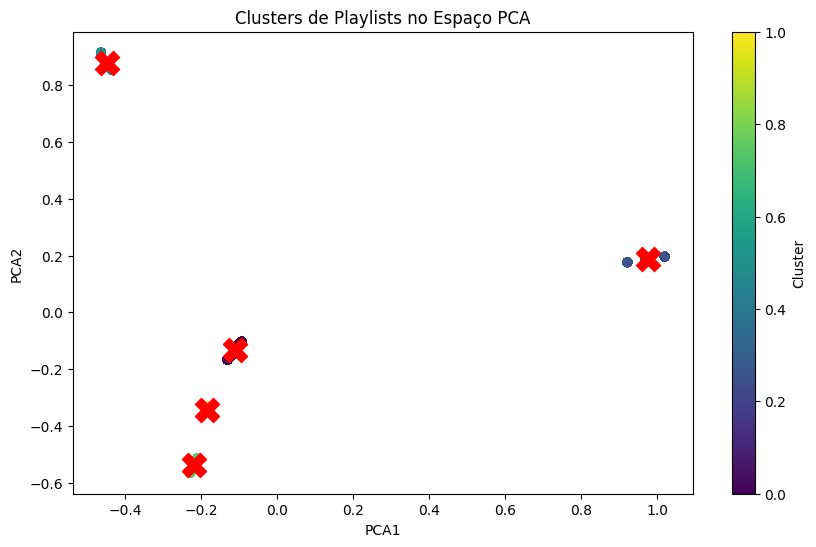

In [ ]:
import matplotlib.pyplot as plt

# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centróides
plt.title('Clusters de Playlists no Espaço PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()


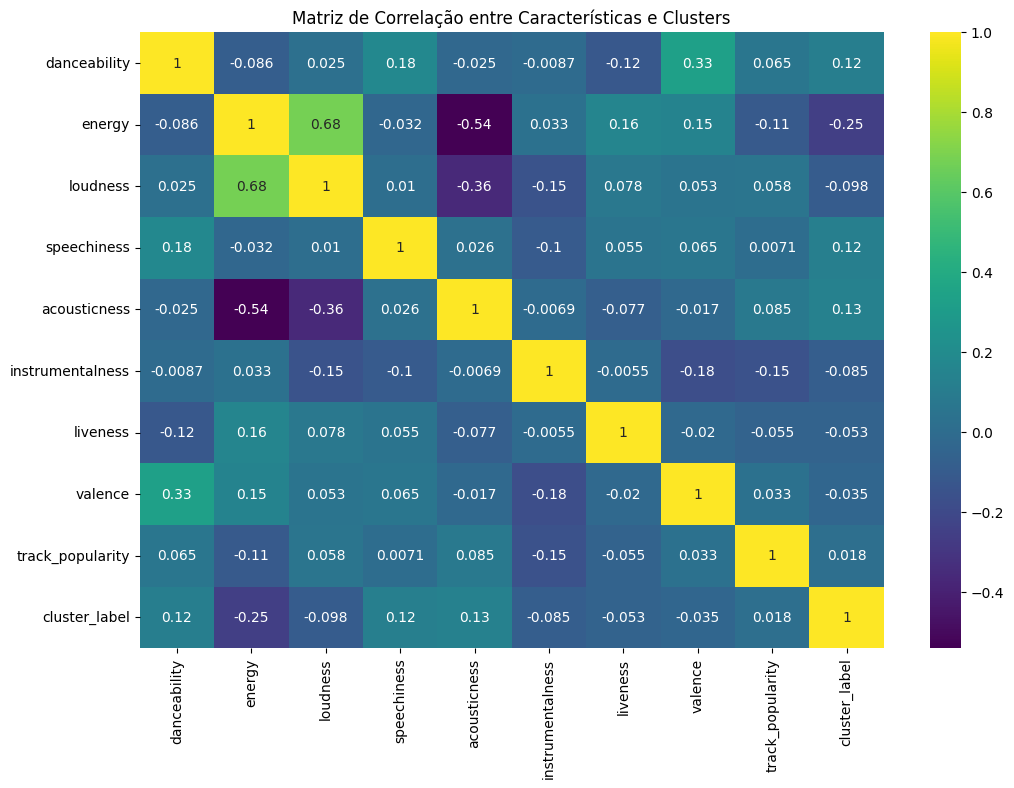

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_spotify[numeric_features + ['cluster_label']].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlação entre Características e Clusters')
plt.show()


In [ ]:
# Redução da Cardinalidade
df_spotify['track_name'] = df_spotify['track_name'].str.lower()  # Converter para minúsculas
df_spotify['track_artist'] = df_spotify['track_artist'].str.lower()  # Converter para minúsculas
df_spotify[['track_name', 'track_artist']].head()

,track_name,track_artist
0,i don't care (with justin bieber) - loud luxur...,ed sheeran
1,memories - dillon francis remix,maroon 5
2,all the time - don diablo remix,zara larsson
3,call you mine - keanu silva remix,the chainsmokers
4,someone you loved - future humans remix,lewis capaldi


- Esse código tem como objetivo reduzir a cardinalidade das colunas "track_name" e "track_artist", ou seja, diminuir o número de valores únicos nessas colunas. Isso é feito convertendo todos os valores das colunas para letras minúsculas.

Ao converter os valores para minúsculas, torna a comparação entre strings mais consistente, pois não haverá distinção entre letras maiúsculas e minúsculas. Isso é útil em casos onde se deseja agrupar ou comparar strings de maneira mais eficiente, especialmente quando os dados podem conter variações na capitalização.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as features numéricas
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness',
                    'valence','track_popularity']

# Normalizar as features numéricas
scaler = MinMaxScaler()
df_spotify[numeric_features] = scaler.fit_transform(df_spotify[numeric_features])

A normalização de features numéricas é uma técnica utilizada no pré-processamento de dados para garantir que todas as características tenham a mesma escala. Isso é especialmente importante quando lidamos com características que têm magnitudes muito diferentes, pois features com valores mais altos podem dominar o processo de treinamento de um modelo de aprendizado de máquina.

Nesse método, características como danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo e duration_ms são ajustadas para uma escala específica, geralmente entre 0 e 1 ou -1 e 1. Essa transformação ajuda a garantir que todas as características contribuam igualmente para o modelo, evitando assim viés devido a diferenças nas magnitudes das características.

A normalização das features numéricas pode ajudar o modelo a convergir mais rapidamente durante o treinamento, melhorando sua eficiência e desempenho. Além disso, contribui para uma melhor interpretação dos resultados, uma vez que as características estão em uma escala comparável.

In [ ]:
df_spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,i don't care (with justin bieber) - loud luxur...,ed sheeran,0.66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,0.918090,1,0.063508,0.102616,0.000000,0.065562,0.522704,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,memories - dillon francis remix,maroon 5,0.67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,0.869162,1,0.040632,0.072837,0.004235,0.358434,0.699294,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,all the time - don diablo remix,zara larsson,0.70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.901368,0,0.080828,0.079879,0.000023,0.110442,0.618567,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,call you mine - keanu silva remix,the chainsmokers,0.60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,0.894118,1,0.111111,0.028873,0.000009,0.204819,0.279516,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,someone you loved - future humans remix,lewis capaldi,0.69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.875385,1,0.039107,0.080785,0.000000,0.083635,0.731584,123.976,189052


## **Processamento**

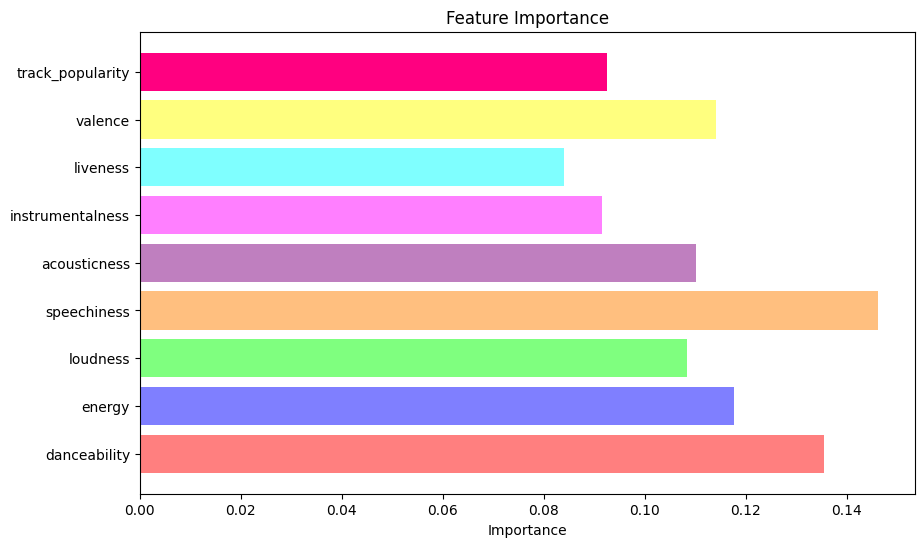

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Dividindo os dados em features (X) e target (y)
X = df_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_popularity']]
y = df_spotify['playlist_genre']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Definindo cores para as barras
colors = [(1, 0, 0, 0.5), (0, 0, 1, 0.5), (0, 1, 0, 0.5), (1, 0.5, 0, 0.5), (0.5, 0, 0.5, 0.5), (1, 0, 1, 0.5), (0, 1, 1, 0.5), (1, 1, 0, 0.5), (1,0,0.5,1)]

# Verificando se o número de cores é igual ao número de features
if len(colors) != len(X.columns):
    raise ValueError("O número de cores não corresponde ao número de features.")

# Plotando a importância das features com cores diferentes para cada barra
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4045080718854706
Classification Report:
               precision    recall  f1-score   support

         edm       0.49      0.52      0.51      1229
       latin       0.32      0.36      0.34       983
         pop       0.24      0.25      0.24      1079
         r&b       0.33      0.32      0.32      1075
         rap       0.45      0.41      0.43      1160
        rock       0.59      0.55      0.57      1040

    accuracy                           0.40      6566
   macro avg       0.41      0.40      0.40      6566
weighted avg       0.41      0.40      0.41      6566



In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em features (X) e target (y)
X = df_spotify[['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness',
                'valence','track_popularity', 'track_name', 'track_artist']]
y = df_spotify['playlist_genre']  # Supondo que 'playlist_genre' seja o alvo que queremos prever

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 26262
Tamanho do conjunto de teste: 6566


In [ ]:
# Selecionar as características e as informações das músicas do conjunto de teste
musicas_aleatorias = X_train.sample(n=5)
musicas_aleatorias = pd.concat([musicas_aleatorias, df_spotify[['track_name', 'track_artist']].loc[musicas_aleatorias.index]], axis=1)

# Exibir as músicas aleatórias selecionadas com suas características, nome e artista
print(musicas_aleatorias)


       danceability    energy  loudness  speechiness  acousticness  \
28643      0.828077  0.754957  0.794690     0.081808      0.013078   
977        0.719227  0.855975  0.892379     0.223312      0.142857   
27628      0.610376  0.946991  0.934727     0.177560      0.039738   
31358      0.648016  0.935989  0.912495     0.045534      0.101610   
17343      0.579858  0.506914  0.851183     0.116558      0.801811   

       instrumentalness  liveness   valence  track_popularity  \
28643          0.002616  0.089257  0.554995              0.56   
977            0.000000  0.124498  0.514632              0.60   
27628          0.000000  0.100402  0.350151              0.47   
31358          0.000379  0.150602  0.813320              0.25   
17343          0.000000  0.107430  0.395560              0.60   

                               track_name        track_artist  
28643        oasis - kyco x barkley remix             the him  
977                 try again (feat. a7s)  tungevaag & raaba

Este código dividirá os dados em features (como danceability, energy, loudness, etc.) e o target (o gênero da playlist).
Em seguida, ele treinará um modelo de árvore de decisão e calculará a importância de cada feature.
Por fim, plotará um gráfico mostrando a importância relativa de cada feature.
Isso ajudará na seleção das features mais relevantes para o modelo de recomendação.

## **Construção do Primeiro Modelo**

In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
num_clusters = 10

# Instanciar o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Treinar o modelo com as características das músicas
kmeans.fit(X_test)

# Obter os clusters resultantes
clusters = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Selecionar as características e as informações das músicas do conjunto de teste
playlist_test = X_test.sample(n=5)
playlist_test = pd.concat([playlist_test, df_spotify[['track_name', 'track_artist']].loc[playlist_test.index]], axis=1)

# Exibir as músicas aleatórias selecionadas com suas características, nome e artista
print(playlist_test)

       danceability    energy  loudness  speechiness  acousticness  \
10133      0.493388  0.681944  0.820024     0.264706      0.390342   
7912       0.665310  0.916985  0.863294     0.348584      0.188129   
7220       0.960326  0.936989  0.866647     0.076688      0.008753   
17651      0.855544  0.692946  0.819584     0.225490      0.398390   
15311      0.501526  0.688946  0.875196     0.035294      0.072334   

       instrumentalness  liveness   valence  track_popularity  \
10133          0.000000  0.075703  0.409687              0.58   
7912           0.000002  0.082430  0.451060              0.44   
7220           0.000000  0.458835  0.956609              0.28   
17651          0.000004  0.133534  0.683148              0.78   
15311          0.000000  0.151606  0.432896              0.30   

                              track_name       track_artist  
10133                             chemia             blacha  
7912                             twijfel             fresku  
72

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
# Converter as colunas 'track_name' e 'track_artist' em valores numéricos usando one-hot encoding
playlist_test_encoded = pd.get_dummies(playlist_test, columns=['track_name', 'track_artist'])

# Garantir que as colunas de 'playlist_test_encoded' e 'X_train' tenham o mesmo número de colunas
missing_cols = set(X_train.columns) - set(playlist_test_encoded.columns)
for col in missing_cols:
    playlist_test_encoded[col] = 0

# Reordenar as colunas para que coincidam
playlist_test_encoded = playlist_test_encoded[X_train.columns]

# Calcular as distâncias entre as músicas fornecidas pelo usuário e todas as outras músicas no conjunto de treinamento
distancias = euclidean_distances(playlist_test_encoded, X_train)

# Encontrar as 10 músicas mais próximas às fornecidas pelo usuário
indices_mais_proximos = distancias.argsort()[0][:10]

# Selecionar as informações das músicas mais próximas
musicas_recomendadas = df_spotify.iloc[indices_mais_proximos][['track_name', 'track_artist', 'danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness','valence','track_popularity']]

# Exibir as músicas recomendadas
print("Músicas recomendadas:")
print(musicas_recomendadas)




Músicas recomendadas:
                          track_name      track_artist  danceability  \
25258                     body parts    raphael saadiq      0.822991   
23963                       la la la        de la soul      0.728383   
25754                   fall in love          goldlink      0.637843   
18857                  que se repita            rigo v      0.822991   
21151  puercos (pigs) - spanish edit      cypress hill      0.774161   
10056                            10k     raffa moreira      0.838250   
25842          spring summer feeling        jill scott      0.688708   
5534                        somebody    internet money      0.640895   
26116                 u do it for me  algebra blessett      0.703967   
1222                           thraa              doje      0.904374   

         energy  loudness  speechiness  acousticness  instrumentalness  \
25258  0.456905  0.812397     0.050763      0.048893          0.003471   
23963  0.835971  0.872661     0.15686

In [ ]:
# Características das músicas de entrada
caracteristicas_musicas_entrada = playlist_test[['danceability', 'energy', 'loudness', 'speechiness',
                                                 'acousticness', 'instrumentalness', 'liveness',
                                                 'valence','track_popularity']].values.tolist()

# Características das músicas recomendadas
caracteristicas_musicas_recomendadas = musicas_recomendadas[['danceability', 'energy', 'loudness', 'speechiness',
                                                              'acousticness', 'instrumentalness', 'liveness',
                                                              'valence','track_popularity']].values.tolist()

# Calcular as distâncias euclidianas entre as características das músicas de entrada e as características das músicas recomendadas
distancias = euclidean_distances(caracteristicas_musicas_entrada, caracteristicas_musicas_recomendadas)

# Calcular a similaridade como o inverso da distância euclidiana (quanto menor a distância, maior a similaridade)
similaridade = 1 / (1 + distancias)

# Calcular a média da similaridade para todas as músicas de entrada e recomendadas
media_similaridade = similaridade.mean()

# Se quiser, você pode imprimir ou retornar a média da similaridade para avaliar a qualidade das recomendações
print("Média da similaridade:", media_similaridade)


Média da similaridade: 0.6332048005585275


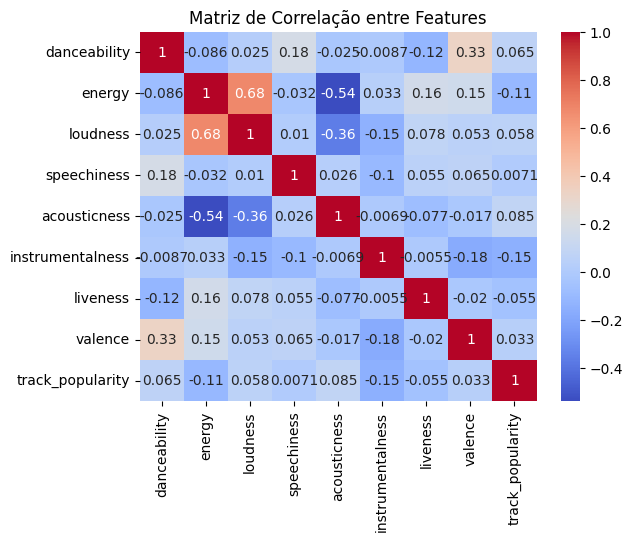

Matriz de Correlação entre Features:
                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000 -0.086074  0.025351     0.181808     -0.024515   
energy               -0.086074  1.000000  0.676662    -0.032184     -0.539732   
loudness              0.025351  0.676662  1.000000     0.010313     -0.361646   
speechiness           0.181808 -0.032184  0.010313     1.000000      0.026168   
acousticness         -0.024515 -0.539732 -0.361646     0.026168      1.000000   
instrumentalness     -0.008658  0.033282 -0.147823    -0.103385     -0.006881   
liveness             -0.123899  0.161317  0.077589     0.055337     -0.077247   
valence               0.330538  0.151050  0.053411     0.064756     -0.016833   
track_popularity      0.064754 -0.108984  0.057717     0.007067      0.085042   

                  instrumentalness  liveness   valence  track_popularity  
danceability             -0.008658 -0.123899  0.330538          0.064754  
en

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação entre as features
correlation_matrix = df_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_popularity']].corr()

# Plotar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre Features")
plt.show()

# Calcular a correlação entre as features
correlation_matrix = df_spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_popularity']].corr()

# Mostrar a matriz de correlação em formato de texto
print("Matriz de Correlação entre Features:")
print(correlation_matrix)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o número de componentes principais desejados (ajustável)
n_components = 5

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verificar a variância explicada pelos componentes principais
print(f'Variância explicada pelos {n_components} componentes principais: {pca.explained_variance_ratio_.sum()}')

Variância explicada pelos 5 componentes principais: 0.8484978545052198


In [ ]:
# Definir o número de clusters desejado
num_clusters = 10

# Instanciar o modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Treinar o modelo com os componentes principais
kmeans.fit(X_train_pca)

# Obter os clusters resultantes
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Selecionar as características e as informações das músicas do conjunto de teste
playlist_test = X_test.sample(n=5)
playlist_test = pd.concat([playlist_test, df_spotify[['track_name', 'track_artist']].loc[playlist_test.index]], axis=1)

# Exibir as músicas aleatórias selecionadas com suas características, nome e artista
print(playlist_test)

       danceability    energy  loudness  speechiness  acousticness  \
18670      0.685656  0.416898  0.810699     0.039542      0.619718   
3579       0.634791  0.841972  0.862540     0.040959      0.265594   
820        0.708037  0.805966  0.739832     0.039325      0.063481   
10013      0.894201  0.779961  0.890954     0.350763      0.122736   
844        0.752798  0.879979  0.812082     0.067974      0.043662   

       instrumentalness  liveness   valence  track_popularity  \
18670          0.000768  0.103414  0.698285              0.35   
3579           0.000021  0.181727  0.259334              0.71   
820            0.001559  0.034438  0.878910              0.50   
10013          0.000000  0.266064  0.855701              0.61   
844            0.008028  0.342369  0.713421              0.59   

                      track_name track_artist  
18670              show yourself   chris2pher  
3579               like a prayer      madonna  
820    think of you - radio edit    whigfiel

In [ ]:
df_spotify = df_spotify.drop(columns=['duration_ms', 'tempo'])

In [ ]:
# Normalizar e aplicar PCA nas músicas de teste
playlist_test_scaled = scaler.transform(playlist_test.drop(columns=['track_name', 'track_artist']))
playlist_test_pca = pca.transform(playlist_test_scaled)

# Calcular as distâncias entre as músicas fornecidas pelo usuário e todas as outras músicas no conjunto de treinamento
distancias = euclidean_distances(playlist_test_pca, X_train_pca)

# Encontrar as 10 músicas mais próximas às fornecidas pelo usuário
indices_mais_proximos = distancias.argsort()[0][:10]

# Selecionar as informações das músicas mais próximas
musicas_recomendadas = df_spotify.iloc[indices_mais_proximos][['track_name', 'track_artist', 'danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness','valence','track_popularity']]

# Exibir as músicas recomendadas
print("Músicas recomendadas:")
print(musicas_recomendadas)

Músicas recomendadas:
                         track_name      track_artist  danceability    energy  \
25474                is it so wrong      rachel mazer      0.750763  0.618933   
25267                    hell yeah!      stacy barthe      0.539166  0.769960   
12072  procession - remastered 2011             queen      0.422177  0.072338   
15460                     infra-red  three days grace      0.577823  0.906984   
5067                       for him.       troye sivan      0.738555  0.617933   
14859           here comes the king     dirty shirley      0.501526  0.900983   
11598         love will conquer all     lionel richie      0.803662  0.442903   
11771             you really got me         the kinks      0.576806  0.958993   
23383                 one call away            chingy      0.778230  0.820969   
2423                       who knew              p!nk      0.699898  0.732953   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
25474  0.805

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Características das músicas de entrada
caracteristicas_musicas_entrada = playlist_test[['danceability', 'energy', 'loudness', 'speechiness',
                                                 'acousticness', 'instrumentalness', 'liveness',
                                                 'valence','track_popularity']].values.tolist()

# Características das músicas recomendadas
caracteristicas_musicas_recomendadas = musicas_recomendadas[['danceability', 'energy', 'loudness', 'speechiness',
                                                              'acousticness', 'instrumentalness', 'liveness',
                                                              'valence','track_popularity']].values.tolist()

# Calcular as distâncias euclidianas entre as características das músicas de entrada e as características das músicas recomendadas
distancias = euclidean_distances(caracteristicas_musicas_entrada, caracteristicas_musicas_recomendadas)

# Calcular a similaridade como o inverso da distância euclidiana (quanto menor a distância, maior a similaridade)
similaridade = 1 / (1 + distancias)

# Calcular a média da similaridade para todas as músicas de entrada e recomendadas
media_similaridade = similaridade.mean()

# Se quiser, você pode imprimir ou retornar a média da similaridade para avaliar a qualidade das recomendações
print("Média da similaridade:", media_similaridade)

Média da similaridade: 0.6242232449025673


##**API Spotify**

In [ ]:
import requests
import base64

# Replace with your own Client ID and Client Secret
CLIENT_ID = 'edf05bbed4e44d44aa27835146b553aa'
CLIENT_SECRET = 'd8cf2707ff474ceda59070d42abb27f8'

# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


In [ ]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

def get_trending_playlist_data(playlist_id, access_token):
    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df_doug = pd.DataFrame(music_data)

    return df_doug

In [ ]:
playlist_id = '51TE1omHa4drkmYBoqVplu' #playlist do doug 2021

# Call the function to get the music data from the playlist and store it in a DataFrame
playlist_doug = get_trending_playlist_data(playlist_id, access_token)

# Display the DataFrame
playlist_doug.head()

,Track Name,Artists,Album Name,Release Date,Popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Pé Na Areia,Diogo Nogueira,Pé Na Areia (Ao Vivo),2016-08-17,64,0.687,0.635,2,-5.936,1,...,0.127,0.717,158.011,audio_features,1b0qrz3GCfvlpo05Dso8Re,spotify:track:1b0qrz3GCfvlpo05Dso8Re,https://api.spotify.com/v1/tracks/1b0qrz3GCfvl...,https://api.spotify.com/v1/audio-analysis/1b0q...,220867,4
1,Velha Infância - 2004 Digital Remaster,Tribalistas,Tribalistas,2002-01-01,70,0.442,0.616,6,-8.128,0,...,0.144,0.565,113.020,audio_features,1mSxbLW7fKABfeY4lGpg0E,spotify:track:1mSxbLW7fKABfeY4lGpg0E,https://api.spotify.com/v1/tracks/1mSxbLW7fKAB...,https://api.spotify.com/v1/audio-analysis/1mSx...,250440,4
2,Já Sei Namorar - 2004 Digital Remaster,Tribalistas,Tribalistas,2002-01-01,67,0.671,0.836,9,-6.672,0,...,0.132,0.837,145.532,audio_features,352FuGmGJClPjojSYjNrXG,spotify:track:352FuGmGJClPjojSYjNrXG,https://api.spotify.com/v1/tracks/352FuGmGJClP...,https://api.spotify.com/v1/audio-analysis/352F...,196933,4
3,5 Regras - Ao Vivo,Jorge & Mateus,É Simples Assim (Ao Vivo),2022-07-28,68,0.761,0.574,11,-8.196,1,...,0.459,0.605,124.185,audio_features,3gCWngngUs1uojw33vrE8K,spotify:track:3gCWngngUs1uojw33vrE8K,https://api.spotify.com/v1/tracks/3gCWngngUs1u...,https://api.spotify.com/v1/audio-analysis/3gCW...,161470,4
4,Basiquinho - Ao Vivo,Matheus & Kauan,Basiquinho (Ao Vivo),2022-08-05,63,0.504,0.827,1,-2.948,1,...,0.101,0.737,75.960,audio_features,2HMbGPbGiqGaHXzFkQAmZI,spotify:track:2HMbGPbGiqGaHXzFkQAmZI,https://api.spotify.com/v1/tracks/2HMbGPbGiqGa...,https://api.spotify.com/v1/audio-analysis/2HMb...,164384,4


In [ ]:
print(playlist_doug.isnull().sum())

Track Name      0
Artists         0
Album Name      0
Release Date    0
Popularity      0
dtype: int64


In [ ]:
# Redução da Cardinalidade
playlist_doug['Track Name'] = playlist_doug['Track Name'].str.lower()  # Converter para minúsculas
playlist_doug['Artists'] = playlist_doug['Artists'].str.lower()  # Converter para minúsculas
playlist_doug[['Track Name', 'Artists']].head()

,Track Name,Artists
0,pé na areia,diogo nogueira
1,velha infância - 2004 digital remaster,tribalistas
2,já sei namorar - 2004 digital remaster,tribalistas
3,5 regras - ao vivo,jorge & mateus
4,basiquinho - ao vivo,matheus & kauan


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as features numéricas
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness',
                    'valence','Popularity']

# Normalizar as features numéricas
scaler = MinMaxScaler()
playlist_doug[numeric_features] = scaler.fit_transform(playlist_doug[numeric_features])
playlist_doug.head()

,Track Name,Artists,Album Name,Release Date,Popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,pé na areia,diogo nogueira,Pé Na Areia (Ao Vivo),2016-08-17,0.735632,0.675145,0.583333,2,0.834137,1,...,0.097450,0.730073,158.011,audio_features,1b0qrz3GCfvlpo05Dso8Re,spotify:track:1b0qrz3GCfvlpo05Dso8Re,https://api.spotify.com/v1/tracks/1b0qrz3GCfvl...,https://api.spotify.com/v1/audio-analysis/1b0q...,220867,4
1,velha infância - 2004 digital remaster,tribalistas,Tribalistas,2002-01-01,0.804598,0.391908,0.561644,6,0.749624,0,...,0.115438,0.569175,113.020,audio_features,1mSxbLW7fKABfeY4lGpg0E,spotify:track:1mSxbLW7fKABfeY4lGpg0E,https://api.spotify.com/v1/tracks/1mSxbLW7fKAB...,https://api.spotify.com/v1/audio-analysis/1mSx...,250440,4
2,já sei namorar - 2004 digital remaster,tribalistas,Tribalistas,2002-01-01,0.770115,0.656647,0.812785,9,0.805760,0,...,0.102740,0.857097,145.532,audio_features,352FuGmGJClPjojSYjNrXG,spotify:track:352FuGmGJClPjojSYjNrXG,https://api.spotify.com/v1/tracks/352FuGmGJClP...,https://api.spotify.com/v1/audio-analysis/352F...,196933,4
3,5 regras - ao vivo,jorge & mateus,É Simples Assim (Ao Vivo),2022-07-28,0.781609,0.760694,0.513699,11,0.747002,1,...,0.448736,0.611517,124.185,audio_features,3gCWngngUs1uojw33vrE8K,spotify:track:3gCWngngUs1uojw33vrE8K,https://api.spotify.com/v1/tracks/3gCWngngUs1u...,https://api.spotify.com/v1/audio-analysis/3gCW...,161470,4
4,basiquinho - ao vivo,matheus & kauan,Basiquinho (Ao Vivo),2022-08-05,0.724138,0.463584,0.802511,1,0.949339,1,...,0.069940,0.751244,75.960,audio_features,2HMbGPbGiqGaHXzFkQAmZI,spotify:track:2HMbGPbGiqGaHXzFkQAmZI,https://api.spotify.com/v1/tracks/2HMbGPbGiqGa...,https://api.spotify.com/v1/audio-analysis/2HMb...,164384,4


In [ ]:
playlist_doug.shape

(565, 23)

In [ ]:
def content_based_recommendations(input_song_name, num_recommendations=5):
    # Verificar se a música de entrada está na base de dados
    if '5 regras - ao vivo' not in playlist_doug['Track Name'].values:
        print(f"'{'5 regras - ao vivo'}' não encontrado na base de dados. Por favor, insira um nome de música válido.")
        return None

    # Obter o índice da música de entrada no DataFrame
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Calcular os scores de similaridade baseados nas características das músicas (usando similaridade de cosseno)
    similarity_scores = cosine_similarity([playlist_doug_features_scaled[input_song_index]], playlist_doug_features_scaled)

    # Obter os índices das músicas mais similares
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Obter os nomes das músicas mais similares com base na filtragem por conteúdo
    content_based_recommendations = playlist_doug.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return content_based_recommendations
    print("content_based_recommendations:")
    print(content_based_recommendations)

In [ ]:
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na base de dados. Por favor, insira um nome de música válido.")
        return None

    # Obter recomendações baseadas em conteúdo
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Obter o score de popularidade da música de entrada
    popularity_score = playlist_doug.loc[playlist_doug['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calcular o score de popularidade ponderado
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(playlist_doug.loc[playlist_doug['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Criar um DataFrame para a música de entrada
    input_song_data = {
        'Track Name': [input_song_name],
        'Artists': [playlist_doug.loc[playlist_doug['Track Name'] == input_song_name, 'Artists'].values[0]],
        'Album Name': [playlist_doug.loc[playlist_doug['Track Name'] == input_song_name, 'Album Name'].values[0]],
        'Release Date': [playlist_doug.loc[playlist_doug['Track Name'] == input_song_name, 'Release Date'].values[0]],
        'Popularity': [weighted_popularity_score]
    }
    input_song_df = pd.DataFrame(input_song_data)

    # Concatenar o DataFrame da música de entrada com as recomendações baseadas em conteúdo
    hybrid_recommendations = pd.concat([content_based_rec, input_song_df], ignore_index=True)

    # Ordenar as recomendações híbridas com base no score de popularidade ponderado
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remover a música de entrada das recomendações
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]

    return hybrid_recommendations


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in df_spotify['track_name'].values:
        print(f"'{input_song_name}' não encontrado na base de dados. Por favor, insira um nome de música válido.")
        return

    # Obter o índice da música de entrada no DataFrame da base de dados
    input_song_index = df_spotify[df_spotify['track_name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence','track_popularity']

    # Calcular os scores de similaridade baseados nas características das músicas (usando similaridade de cosseno)
    similarity_scores = cosine_similarity(df_spotify[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Obter as músicas mais similares com base no filtro baseado em conteúdo
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    return content_based_recommendations

input_song_name = "animals"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"Recomendações com base no conteúdo para '{input_song_name}':")
print(recommendations.to_string(index=False))


Recomendações com base no conteúdo para 'animals':
                                   track_name  track_artist                              track_album_name  track_popularity
now that i've found you (feat. john & michel) martin garrix Now That I've Found You (feat. John & Michel)              0.04
now that i've found you (feat. john & michel) martin garrix Now That I've Found You (feat. John & Michel)              0.04
                         heroes (we could be)        alesso                                       Forever              0.06
                                   rebel yell    billy idol                         Absolute Rock Anthems              0.00
              pick up the pieces - radio edit     maor levi                            Pick Up The Pieces              0.11


In [ ]:
def evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5):
    # Verificar se a música de entrada está presente na base de dados
    if input_song_name not in df_spotify['track_name'].values:
        print(f"'{input_song_name}' não encontrado na base de dados. Por favor, insira um nome de música válido.")
        return None

    # Obter o índice da música de entrada no DataFrame da base de dados
    input_song_index = df_spotify[df_spotify['track_name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence','track_popularity']

    # Calcular os scores de similaridade baseados nas características das músicas (usando similaridade de cosseno)
    similarity_scores = cosine_similarity(df_spotify[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Obter as músicas mais similares com base no filtro baseado em conteúdo
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    # Verificar quantas músicas de teste estão corretamente recomendadas
    correct_recommendations = 0
    for test_song in test_songs:
        if test_song in content_based_recommendations['track_name'].values:
            correct_recommendations += 1

    # Calcular a acurácia do modelo
    accuracy = correct_recommendations / len(test_songs)
    return accuracy

# Música de entrada (substitua com a música que deseja testar)
input_song_name = "animals"

# Músicas de teste (substitua com as músicas que deseja testar)
test_songs = ["now that i've found you (feat. john & michel)", "heroes (we could be)", "rebel yell", "pick up the pieces - radio edit"]

# Avaliar a acurácia do modelo
accuracy = evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 1.0


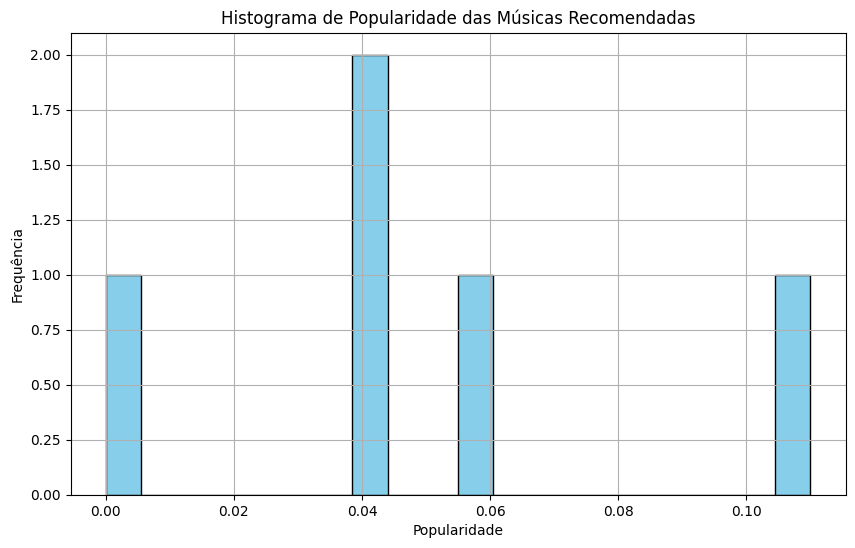

In [ ]:
import matplotlib.pyplot as plt

# Histograma de popularidade das músicas recomendadas
plt.figure(figsize=(10, 6))
plt.hist(recommendations['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Popularidade das Músicas Recomendadas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

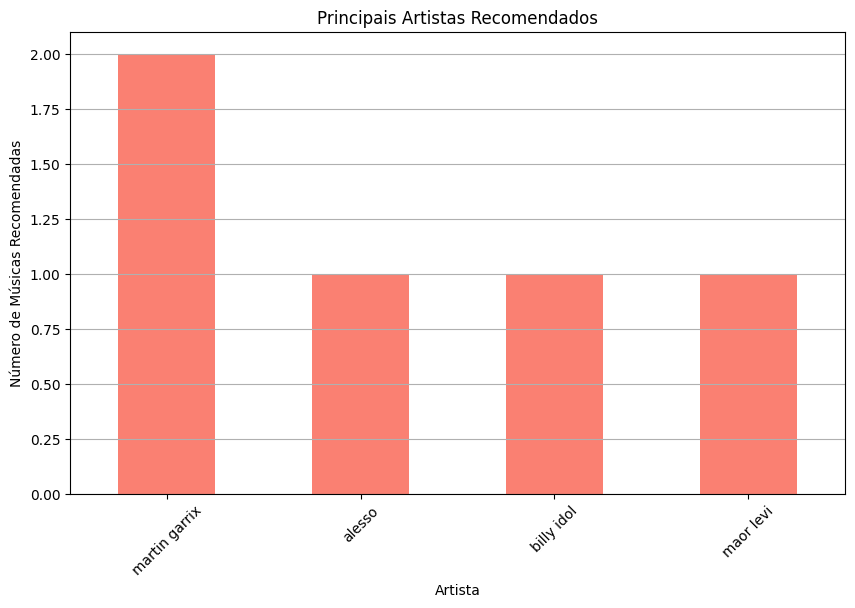

In [ ]:
# Gráfico de barras dos principais artistas recomendados
top_artists = recommendations['track_artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Principais Artistas Recomendados')
plt.xlabel('Artista')
plt.ylabel('Número de Músicas Recomendadas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

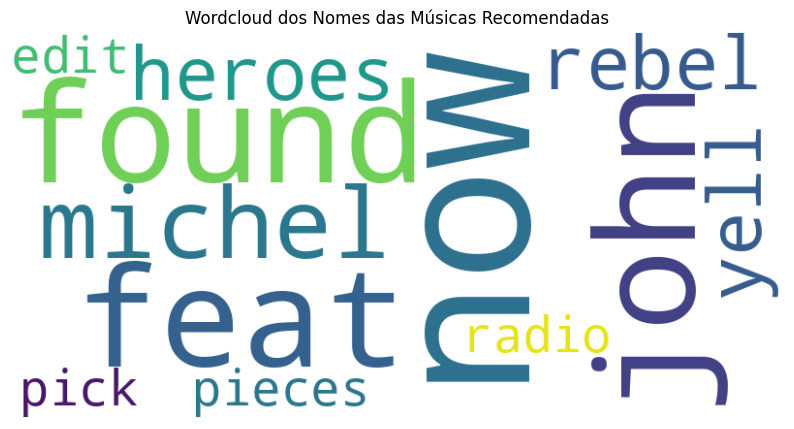

In [ ]:
from wordcloud import WordCloud

# Concatenar os nomes das músicas recomendadas
text = ' '.join(recommendations['track_name'])

# Gerar a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud dos Nomes das Músicas Recomendadas')
plt.axis('off')
plt.show()


## **Recomendação ao perfil de usuario**

In [ ]:
#Recomendando músicas eletronicas

from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return

    # Obter o índice da música de entrada na playlist
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist e da base de dados
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados df_spotify
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados df_spotify
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    return content_based_recommendations

input_song_name = "intense"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"Recomendações com base no conteúdo para '{input_song_name}':")
print(recommendations.to_string(index=False))

Recomendações com base no conteúdo para 'intense':
            track_name track_artist    track_album_name  track_popularity
                    if      esquire                  If              0.18
arcadia - original mix     hardwell             Arcadia              0.22
              calavera     hardwell            Calavera              0.43
              need you    tinlicker            Need You              0.40
   let's get f*cked up         makj Let's Get F*cked Up              0.42


In [ ]:
#Recomendando músicas aleatorias

from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return

    # Obter o índice da música de entrada na playlist
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist e da base de dados
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados df_spotify
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados df_spotify
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    return content_based_recommendations

input_song_name = "dona"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"Recomendações com base no conteúdo para '{input_song_name}':")
print(recommendations.to_string(index=False))

Recomendações com base no conteúdo para 'dona':
                                                         track_name  track_artist                            track_album_name  track_popularity
dust in the wind (acoustic guitar solo) - live acoustic guitar solo        kansas Two For The Show (30th Anniversary Edition)              0.33
                                            hola - acústico en vivo         dalex      Rich Music Sessions (Acústico En Vivo)              0.55
                                   dreamer's ball - remastered 2011         queen                        Jazz (2011 Remaster)              0.41
                                                      death & taxes daniel caesar                          Pilgrim's Paradise              0.61
                                             meet me in the hallway  harry styles                                Harry Styles              0.71


In [ ]:
def evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5):
    # Verificar se a música de entrada está presente na playlist_doug
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return None

    # Obter o índice da música de entrada na playlist_doug
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist_doug e da base de dados df_spotify
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados df_spotify
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados df_spotify
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    # Verificar quantas músicas de teste estão corretamente recomendadas
    correct_recommendations = 0
    for test_song in test_songs:
        if test_song in content_based_recommendations['track_name'].values:
            correct_recommendations += 1

    # Calcular a acurácia do modelo
    accuracy = correct_recommendations / len(test_songs)
    return accuracy

# Música de entrada (substitua com a música que deseja testar)
input_song_name = "dona"

# Músicas de teste (substitua com as músicas que deseja testar)
test_songs = ["dust in the wind (acoustic guitar solo) - live acoustic guitar solo)", "hola - acústico en vivo)", "dreamer's ball - remastered 2011", "death & taxes", "meet me in the hallway"]

# Avaliar a acurácia do modelo
accuracy = evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5)
print(f"Acurácia do modelo: {accuracy}")


Acurácia do modelo: 0.6


In [ ]:
#Recomendando músicas aleatorias

from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return

    # Obter o índice da música de entrada na playlist
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist e da base de dados
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados df_spotify
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados df_spotify
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    return content_based_recommendations

input_song_name = "i got you - 1964 smash version"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"Recomendações com base no conteúdo para '{input_song_name}':")
print(recommendations.to_string(index=False))

Recomendações com base no conteúdo para 'i got you - 1964 smash version':
  track_name            track_artist       track_album_name  track_popularity
      ufødte                 jamaika                 Ufødte              0.55
  just a dog                 big moe               Moe Life              0.44
    all i do                    êmia               All I Do              0.36
   rich girl daryl hall & john oates Bigger Than Both Of Us              0.70
trust nobody            cashmere cat           Trust Nobody              0.02


In [ ]:
def evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5):
    # Verificar se a música de entrada está presente na playlist_doug
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return None

    # Obter o índice da música de entrada na playlist_doug
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist_doug e da base de dados df_spotify
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          df_spotify[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados df_spotify
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados df_spotify
    content_based_recommendations = df_spotify.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_popularity']]

    # Verificar quantas músicas de teste estão corretamente recomendadas
    correct_recommendations = 0
    for test_song in test_songs:
        if test_song in content_based_recommendations['track_name'].values:
            correct_recommendations += 1

    # Calcular a acurácia do modelo
    accuracy = correct_recommendations / len(test_songs)
    return accuracy

# Música de entrada (substitua com a música que deseja testar)
input_song_name = "i got you - 1964 smash version"

# Músicas de teste (substitua com as músicas que deseja testar)
test_songs = ["ufødte", "trust nobody", "just a dog", "all i do", "rich girl"]

# Avaliar a acurácia do modelo
accuracy = evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 1.0


In [ ]:
#Recomendando músicas aleatorias

from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return

    # Obter o índice da música de entrada na playlist
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist e da base de dados
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          X_test[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados X_test
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados X_test
    content_based_recommendations = X_test.iloc[similar_song_indices][['track_name', 'track_artist', 'track_popularity']]

    return content_based_recommendations

input_song_name = "i got you - 1964 smash version"
recommendations = content_based_recommendations(input_song_name, num_recommendations=5)
print(f"Recomendações com base no conteúdo para '{input_song_name}':")
print(recommendations.to_string(index=False))

Recomendações com base no conteúdo para 'i got you - 1964 smash version':
                     track_name            track_artist  track_popularity
                         ufødte                 jamaika              0.55
                   trust nobody            cashmere cat              0.02
                 trabalho lindo              wc no beat              0.41
         mr. right or mr. wrong       peggy scott-adams              0.30
where would i be (the question) kindred the family soul              0.40


In [ ]:
def evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5):
    # Verificar se a música de entrada está presente na playlist_doug
    if input_song_name not in playlist_doug['Track Name'].values:
        print(f"'{input_song_name}' não encontrado na playlist. Por favor, insira um nome de música válido.")
        return None

    # Obter o índice da música de entrada na playlist_doug
    input_song_index = playlist_doug[playlist_doug['Track Name'] == input_song_name].index[0]

    # Selecionar apenas as colunas numéricas relevantes para o cálculo da similaridade de cosseno
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence']

    # Calcular os scores de similaridade baseados nas características das músicas da playlist_doug e da base de dados X_test
    similarity_scores = cosine_similarity(playlist_doug[numeric_columns].iloc[[input_song_index]],
                                          X_test[numeric_columns])

    # Obter os índices das músicas mais similares na base de dados X_test
    similar_song_indices = similarity_scores.argsort()[0][::-1][:num_recommendations]

    # Obter as músicas mais similares da base de dados X_test
    content_based_recommendations = X_test.iloc[similar_song_indices][['track_name', 'track_artist', 'track_popularity']]

    # Verificar quantas músicas de teste estão corretamente recomendadas
    correct_recommendations = 0
    for test_song in test_songs:
        if test_song in content_based_recommendations['track_name'].values:
            correct_recommendations += 1

    # Calcular a acurácia do modelo
    accuracy = correct_recommendations / len(test_songs)
    return accuracy

# Música de entrada (substitua com a música que deseja testar)
input_song_name = "i got you - 1964 smash version"

# Músicas de teste (substitua com as músicas que deseja testar)
test_songs = ["ufødte", "trust nobody", "trabalho lindo", "mr. right or mr. wrong", "where would i be (the question)"]

# Avaliar a acurácia do modelo
accuracy = evaluate_content_based_recommendations(input_song_name, test_songs, num_recommendations=5)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 1.0
